In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/sample_data/test.csv')

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
df.shape

(367, 12)

In [ ]:
df.drop(['Loan_ID'],axis =1,inplace=True)

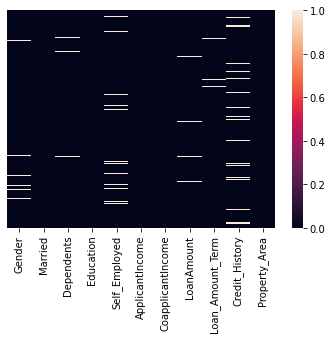

In [ ]:
sns.heatmap(df.isnull(),yticklabels= False, cbar = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             356 non-null    object 
 1   Married            367 non-null    object 
 2   Dependents         357 non-null    object 
 3   Education          367 non-null    object 
 4   Self_Employed      344 non-null    object 
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    int64  
 7   LoanAmount         362 non-null    float64
 8   Loan_Amount_Term   361 non-null    float64
 9   Credit_History     338 non-null    float64
 10  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 31.7+ KB


In [ ]:
df.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [ ]:
print(df.Gender.unique())
print(df.Married.unique())
print(df.Dependents.unique())
print(df.Self_Employed.unique())
print(df.LoanAmount.unique())
print(df.Loan_Amount_Term.unique())
print(df.Credit_History.unique())

['Male' 'Female' nan]
['Yes' 'No']
['0' '1' '2' '3+' nan]
['No' 'Yes' nan]
[110. 126. 208. 100.  78. 152.  59. 147. 280. 123.  90. 162.  40. 166.
 124. 131. 200. 300.  48.  28. 101. 125. 290. 148. 140. 275.  57.  75.
 192. 158. 176. 185. 116. 138.  84. 108. 187. 120. 160.  30.  92. 130.
 134. 189. 135. 188.  95.  65. 139. 232. 144. 155. 186.  50.  nan 163.
 360. 149. 257. 102.  77. 390. 256.  61. 107. 119. 165.  93. 122. 157.
 180.  80. 104. 213. 146.  71. 225.  70. 132. 105.  83. 103. 150. 550.
 260. 199. 113. 117.  72. 214. 133. 143. 209. 170.  94.  79. 159. 173.
 235. 336.  96. 128. 412. 114. 115.  88.  55. 118. 212.  74.  66.  64.
 142. 151.  81. 171. 234. 184. 112.  49.  99. 240. 460. 297. 106. 141.
 145. 177.  68. 183. 121. 153.  67. 181.  35.  46.  87. 137. 254. 109.
 197.  85.  60.  76.  98.]
[360. 240. 180.  nan  60. 480.  84.  12. 300. 350.  36. 120.   6.]
[ 1. nan  0.]


In [ ]:
print(df.Education.unique())
print(df.Property_Area.unique())

['Graduate' 'Not Graduate']
['Urban' 'Semiurban' 'Rural']


In [ ]:
df['Property_Area'].replace('Rural',0,inplace=True) 
df['Property_Area'].replace('Semiurban',1,inplace=True) 
df['Property_Area'].replace('Urban',2,inplace=True)

In [ ]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [ ]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Education']=le.fit_transform(df['Education'])
# df['Property_Area']=le.fit_transform(df['Property_Area'])
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,0,No,5720,0,110.0,360.0,1.000000,2
1,Male,Yes,1,0,No,3076,1500,126.0,360.0,1.000000,2
2,Male,Yes,2,0,No,5000,1800,208.0,360.0,1.000000,2
3,Male,Yes,2,0,No,2340,2546,100.0,360.0,0.825444,2
4,Male,No,0,1,No,3276,0,78.0,360.0,1.000000,2


In [ ]:
df1 = pd.get_dummies(df['Gender'],drop_first=True)
df.drop(['Gender'],axis=1,inplace=True)
df1.head()

,Male
0,1
1,1
2,1
3,1
4,1


In [ ]:
df2 = pd.get_dummies(df['Married'],drop_first=True)
df.drop(['Married'],axis=1,inplace=True)
df2.head()

,Yes
0,1
1,1
2,1
3,1
4,0


In [ ]:
# df3 = pd.get_dummies(df['Dependents'],drop_first=True)
# df.drop(['Dependents'],axis=1,inplace=True)
# df3.head()

df['Dependents'].replace('3+',4,inplace=True) 

In [ ]:
df4 = pd.get_dummies(df['Self_Employed'],drop_first=True)
df.drop(['Self_Employed'],axis=1,inplace=True)
df4.head()

,Yes
0,0
1,0
2,0
3,0
4,0


In [ ]:
df=pd.concat([df1,df2,df4,df],axis=1)

In [ ]:
df.head()

,Male,Yes,Yes,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,5720,0,110.0,360.0,1.000000,2
1,1,1,0,1,0,3076,1500,126.0,360.0,1.000000,2
2,1,1,0,2,0,5000,1800,208.0,360.0,1.000000,2
3,1,1,0,2,0,2340,2546,100.0,360.0,0.825444,2
4,1,0,0,0,1,3276,0,78.0,360.0,1.000000,2


In [ ]:
df.shape

(367, 11)

In [ ]:
# Store it into .csv file for prediction after Model Building
df.to_csv('/content/sample_data/new_test.csv',index=False)